### Import libraries and data

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

sns.set_theme(color_codes=True)

In [3]:
!ls data

bom.movie_gross.csv  rt.reviews.tsv    title.principals.csv
df_all3.csv	     title.akas.csv    title.ratings.csv
name.basics.csv      title.basics.csv  tmdb.movies.csv
rt.movie_info.tsv    title.crew.csv    tn.movie_budgets.csv


In [4]:
# Title, Studio, Domestic Gross, Foreign Gross, Year
movie_gross_df = pd.read_csv('data/bom.movie_gross.csv')

# Name variable (nconst), Name of Crew/Principal, Primary Profession, Known for Titles (tconst)
people_info_df = pd.read_csv('data/name.basics.csv')

# ID, Rating, Genre, Director, Writer, Theater Date, Box Office, Runtime, Studio
rt_movie_info_df = pd.read_csv('data/rt.movie_info.tsv', delimiter='\t')

# ID, Rating, Fresh, Top Critic
rt_movie_reviews_df = pd.read_csv('data/rt.reviews.tsv', delimiter='\t', encoding='latin1')

# Title ID, Title, Region, Language
title_akas_df = pd.read_csv('data/title.akas.csv')

# Title ID (tconst), Primary Title, Original Title, Year, Runtime, Genres
title_basics_df = pd.read_csv('data/title.basics.csv')

# Title ID (tconst), Directors (nconst), Writers (nconst)
title_crew_df = pd.read_csv('data/title.crew.csv')

# Title ID (tconst), People (nconst), Category (primary profession)
title_principals_df = pd.read_csv('data/title.principals.csv')

# Titled ID (tconst), Rating, Num Votes
title_ratings_df = pd.read_csv('data/title.ratings.csv')

# Genre, Language, Original Title, Popularity, Date, Title, Average Rating, Num of Ratings
tmdb_movies_df = pd.read_csv('data/tmdb.movies.csv')

# Release Date, Title, Budget, Domestic Gross, Worldwide Gross
movie_budgets_df = pd.read_csv('data/tn.movie_budgets.csv')

### Splitting up the work

Matt is going to work on joining any of the dataframes with the tconst or nconst variables.

Grace will work on joining the Rotten Tomatoes dataframes.

Jeff will work on joining the rest.

### Matt's dataframes for reference:

people_info_df

title_akas_df

title_basics_df

title_crew_df

title_principals_df

title_ratings_df

### Get column names, shape, and number of unique values

In [5]:
print(people_info_df.columns)

print(title_akas_df.columns)

print(title_basics_df.columns)

print(title_crew_df.columns)

print(title_principals_df.columns)

print(title_ratings_df.columns)

Index(['nconst', 'primary_name', 'birth_year', 'death_year',
       'primary_profession', 'known_for_titles'],
      dtype='object')
Index(['title_id', 'ordering', 'title', 'region', 'language', 'types',
       'attributes', 'is_original_title'],
      dtype='object')
Index(['tconst', 'primary_title', 'original_title', 'start_year',
       'runtime_minutes', 'genres'],
      dtype='object')
Index(['tconst', 'directors', 'writers'], dtype='object')
Index(['tconst', 'ordering', 'nconst', 'category', 'job', 'characters'], dtype='object')
Index(['tconst', 'averagerating', 'numvotes'], dtype='object')


In [6]:
print(people_info_df.shape)

print(title_akas_df.shape)

print(title_basics_df.shape)

print(title_crew_df.shape)

print(title_principals_df.shape)

print(title_ratings_df.shape)

(606648, 6)
(331703, 8)
(146144, 6)
(146144, 3)
(1028186, 6)
(73856, 3)


In [7]:
print(people_info_df.shape)

print(len(pd.unique(title_akas_df['title_id'])))

print(len(pd.unique(title_basics_df['tconst'])))

print(len(pd.unique(title_crew_df['tconst'])))

print(len(pd.unique(title_principals_df['tconst'])))

print(len(pd.unique(title_ratings_df['tconst'])))

(606648, 6)
122302
146144
146144
143454
73856


### Joining the dataframes

...through a series of successive left joins on columns contain a 
'tconst' value, starting with the dataframe containing the highest number of 'tconst' items.

In [8]:
first_join = title_basics_df.merge(title_crew_df, how='left', left_on='tconst', right_on='tconst')
first_join

,tconst,primary_title,original_title,start_year,runtime_minutes,genres,directors,writers
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama",nm0712540,"nm0023551,nm1194313,nm0347899,nm1391276"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama",nm0002411,NaN
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama,nm0000080,"nm0000080,nm0462648"
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama",nm0611531,nm0347899
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy","nm0765384,nm0749914","nm1360635,nm0749914"
...,...,...,...,...,...,...,...,...
146139,tt9916538,Kuambil Lagi Hatiku,Kuambil Lagi Hatiku,2019,123.0,Drama,nm8185151,"nm4843252,nm4900525,nm2679404"
146140,tt9916622,Rodolpho Teóphilo - O Legado de um Pioneiro,Rodolpho Teóphilo - O Legado de um Pioneiro,2015,NaN,Documentary,"nm9272490,nm9272491","nm9272490,nm9272491"
146141,tt9916706,Dankyavar Danka,Dankyavar Danka,2013,NaN,Comedy,nm7764440,nm7933903
146142,tt9916730,6 Gunn,6 Gunn,2017,116.0,NaN,nm10538612,nm10538612


In [9]:
second_join = first_join.merge(title_principals_df, how='left', left_on='tconst', right_on='tconst')
second_join

,tconst,primary_title,original_title,start_year,runtime_minutes,genres,directors,writers,ordering,nconst,category,job,characters
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama",nm0712540,"nm0023551,nm1194313,nm0347899,nm1391276",10.0,nm0006210,composer,NaN,NaN
1,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama",nm0712540,"nm0023551,nm1194313,nm0347899,nm1391276",1.0,nm0474801,actor,NaN,"[""Kundan S. Prasad"",""Bajrangi""]"
2,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama",nm0712540,"nm0023551,nm1194313,nm0347899,nm1391276",2.0,nm0904537,actress,NaN,"[""Munni"",""Laila-E-Aasmaan""]"
3,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama",nm0712540,"nm0023551,nm1194313,nm0347899,nm1391276",3.0,nm0756379,actor,NaN,"[""Ganeshi N. Prasad""]"
4,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama",nm0712540,"nm0023551,nm1194313,nm0347899,nm1391276",4.0,nm0474876,actor,NaN,"[""Dwarka N. Prasad""]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1030871,tt9916754,Chico Albuquerque - Revelações,Chico Albuquerque - Revelações,2013,NaN,Documentary,"nm9272490,nm8349149","nm8349149,nm9272490",5.0,nm9272490,director,supervising director,NaN
1030872,tt9916754,Chico Albuquerque - Revelações,Chico Albuquerque - Revelações,2013,NaN,Documentary,"nm9272490,nm8349149","nm8349149,nm9272490",6.0,nm8349149,director,co-director,NaN
1030873,tt9916754,Chico Albuquerque - Revelações,Chico Albuquerque - Revelações,2013,NaN,Documentary,"nm9272490,nm8349149","nm8349149,nm9272490",7.0,nm9272489,cinematographer,NaN,NaN
1030874,tt9916754,Chico Albuquerque - Revelações,Chico Albuquerque - Revelações,2013,NaN,Documentary,"nm9272490,nm8349149","nm8349149,nm9272490",8.0,nm10538638,cinematographer,NaN,NaN


In [10]:
third_join = second_join.merge(title_ratings_df, how='left', left_on='tconst', right_on='tconst')
third_join

,tconst,primary_title,original_title,start_year,runtime_minutes,genres,directors,writers,ordering,nconst,category,job,characters,averagerating,numvotes
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama",nm0712540,"nm0023551,nm1194313,nm0347899,nm1391276",10.0,nm0006210,composer,NaN,NaN,7.0,77.0
1,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama",nm0712540,"nm0023551,nm1194313,nm0347899,nm1391276",1.0,nm0474801,actor,NaN,"[""Kundan S. Prasad"",""Bajrangi""]",7.0,77.0
2,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama",nm0712540,"nm0023551,nm1194313,nm0347899,nm1391276",2.0,nm0904537,actress,NaN,"[""Munni"",""Laila-E-Aasmaan""]",7.0,77.0
3,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama",nm0712540,"nm0023551,nm1194313,nm0347899,nm1391276",3.0,nm0756379,actor,NaN,"[""Ganeshi N. Prasad""]",7.0,77.0
4,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama",nm0712540,"nm0023551,nm1194313,nm0347899,nm1391276",4.0,nm0474876,actor,NaN,"[""Dwarka N. Prasad""]",7.0,77.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1030871,tt9916754,Chico Albuquerque - Revelações,Chico Albuquerque - Revelações,2013,NaN,Documentary,"nm9272490,nm8349149","nm8349149,nm9272490",5.0,nm9272490,director,supervising director,NaN,NaN,NaN
1030872,tt9916754,Chico Albuquerque - Revelações,Chico Albuquerque - Revelações,2013,NaN,Documentary,"nm9272490,nm8349149","nm8349149,nm9272490",6.0,nm8349149,director,co-director,NaN,NaN,NaN
1030873,tt9916754,Chico Albuquerque - Revelações,Chico Albuquerque - Revelações,2013,NaN,Documentary,"nm9272490,nm8349149","nm8349149,nm9272490",7.0,nm9272489,cinematographer,NaN,NaN,NaN,NaN
1030874,tt9916754,Chico Albuquerque - Revelações,Chico Albuquerque - Revelações,2013,NaN,Documentary,"nm9272490,nm8349149","nm8349149,nm9272490",8.0,nm10538638,cinematographer,NaN,NaN,NaN,NaN


In [11]:
fourth_join = third_join.merge(title_akas_df, how='left', left_on='tconst', right_on='title_id')
fourth_join

,tconst,primary_title,original_title,start_year,runtime_minutes,genres,directors,writers,ordering_x,nconst,...,averagerating,numvotes,title_id,ordering_y,title,region,language,types,attributes,is_original_title
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama",nm0712540,"nm0023551,nm1194313,nm0347899,nm1391276",10.0,nm0006210,...,7.0,77.0,tt0063540,1.0,Sangharsh,IN,hi,NaN,alternative transliteration,0.0
1,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama",nm0712540,"nm0023551,nm1194313,nm0347899,nm1391276",10.0,nm0006210,...,7.0,77.0,tt0063540,2.0,Sunghursh,NaN,NaN,original,NaN,1.0
2,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama",nm0712540,"nm0023551,nm1194313,nm0347899,nm1391276",10.0,nm0006210,...,7.0,77.0,tt0063540,3.0,Sunghursh,IN,NaN,NaN,NaN,0.0
3,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama",nm0712540,"nm0023551,nm1194313,nm0347899,nm1391276",10.0,nm0006210,...,7.0,77.0,tt0063540,4.0,Sunghursh,IN,hi,NaN,alternative transliteration,0.0
4,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama",nm0712540,"nm0023551,nm1194313,nm0347899,nm1391276",10.0,nm0006210,...,7.0,77.0,tt0063540,5.0,Sungharsh,IN,hi,NaN,alternative spelling,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2975780,tt9916754,Chico Albuquerque - Revelações,Chico Albuquerque - Revelações,2013,NaN,Documentary,"nm9272490,nm8349149","nm8349149,nm9272490",5.0,nm9272490,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2975781,tt9916754,Chico Albuquerque - Revelações,Chico Albuquerque - Revelações,2013,NaN,Documentary,"nm9272490,nm8349149","nm8349149,nm9272490",6.0,nm8349149,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2975782,tt9916754,Chico Albuquerque - Revelações,Chico Albuquerque - Revelações,2013,NaN,Documentary,"nm9272490,nm8349149","nm8349149,nm9272490",7.0,nm9272489,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2975783,tt9916754,Chico Albuquerque - Revelações,Chico Albuquerque - Revelações,2013,NaN,Documentary,"nm9272490,nm8349149","nm8349149,nm9272490",8.0,nm10538638,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [12]:
fourth_join['title_id'].isna().sum()

134509

In [13]:
fourth_join.groupby('original_title').count()

,tconst,primary_title,start_year,runtime_minutes,genres,directors,writers,ordering_x,nconst,category,...,averagerating,numvotes,title_id,ordering_y,title,region,language,types,attributes,is_original_title
original_title,,,,,,,,,,,,,,,,,,,,,
#1 Serial Killer,30,30,30,30,30,30,30,30,30,30,...,30,30,30,30,30,10,0,20,0,30
#5,9,9,9,2,9,9,9,9,9,9,...,2,2,2,2,2,2,0,0,0,2
#50Fathers,9,9,9,9,9,9,9,9,9,9,...,0,0,9,9,9,9,0,0,0,9
#66,10,10,10,10,10,10,10,10,10,10,...,10,10,10,10,10,10,0,0,0,10
#82 Summits,5,5,5,5,5,5,0,5,5,5,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ärtico,50,50,50,50,50,50,50,50,50,50,...,50,50,50,50,50,40,0,30,0,50
è solo questione di punti di vista,8,8,8,8,8,8,8,8,8,8,...,0,0,8,8,8,8,0,0,0,8
è solo questione di tempo,15,15,15,15,15,15,15,15,15,15,...,0,0,15,15,15,10,0,10,0,15


In [14]:
people_info_df

,nconst,primary_name,birth_year,death_year,primary_profession,known_for_titles
0,nm0061671,Mary Ellen Bauder,NaN,NaN,"miscellaneous,production_manager,producer","tt0837562,tt2398241,tt0844471,tt0118553"
1,nm0061865,Joseph Bauer,NaN,NaN,"composer,music_department,sound_department","tt0896534,tt6791238,tt0287072,tt1682940"
2,nm0062070,Bruce Baum,NaN,NaN,"miscellaneous,actor,writer","tt1470654,tt0363631,tt0104030,tt0102898"
3,nm0062195,Axel Baumann,NaN,NaN,"camera_department,cinematographer,art_department","tt0114371,tt2004304,tt1618448,tt1224387"
4,nm0062798,Pete Baxter,NaN,NaN,"production_designer,art_department,set_decorator","tt0452644,tt0452692,tt3458030,tt2178256"
...,...,...,...,...,...,...
606643,nm9990381,Susan Grobes,NaN,NaN,actress,NaN
606644,nm9990690,Joo Yeon So,NaN,NaN,actress,"tt9090932,tt8737130"
606645,nm9991320,Madeline Smith,NaN,NaN,actress,"tt8734436,tt9615610"
606646,nm9991786,Michelle Modigliani,NaN,NaN,producer,NaN


In [15]:
fifth_join = fourth_join.merge(people_info_df, how='left', left_on='nconst', right_on='nconst')
fifth_join

,tconst,primary_title,original_title,start_year,runtime_minutes,genres,directors,writers,ordering_x,nconst,...,region,language,types,attributes,is_original_title,primary_name,birth_year,death_year,primary_profession,known_for_titles
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama",nm0712540,"nm0023551,nm1194313,nm0347899,nm1391276",10.0,nm0006210,...,IN,hi,NaN,alternative transliteration,0.0,Naushad,1919.0,2006.0,"composer,soundtrack,music_department","tt0054910,tt0266765,tt0044392,tt0053999"
1,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama",nm0712540,"nm0023551,nm1194313,nm0347899,nm1391276",10.0,nm0006210,...,NaN,NaN,original,NaN,1.0,Naushad,1919.0,2006.0,"composer,soundtrack,music_department","tt0054910,tt0266765,tt0044392,tt0053999"
2,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama",nm0712540,"nm0023551,nm1194313,nm0347899,nm1391276",10.0,nm0006210,...,IN,NaN,NaN,NaN,0.0,Naushad,1919.0,2006.0,"composer,soundtrack,music_department","tt0054910,tt0266765,tt0044392,tt0053999"
3,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama",nm0712540,"nm0023551,nm1194313,nm0347899,nm1391276",10.0,nm0006210,...,IN,hi,NaN,alternative transliteration,0.0,Naushad,1919.0,2006.0,"composer,soundtrack,music_department","tt0054910,tt0266765,tt0044392,tt0053999"
4,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama",nm0712540,"nm0023551,nm1194313,nm0347899,nm1391276",10.0,nm0006210,...,IN,hi,NaN,alternative spelling,0.0,Naushad,1919.0,2006.0,"composer,soundtrack,music_department","tt0054910,tt0266765,tt0044392,tt0053999"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2975780,tt9916754,Chico Albuquerque - Revelações,Chico Albuquerque - Revelações,2013,NaN,Documentary,"nm9272490,nm8349149","nm8349149,nm9272490",5.0,nm9272490,...,NaN,NaN,NaN,NaN,NaN,Angela Gurgel,NaN,NaN,"director,writer","tt10006546,tt10231530,tt7378802,tt9916754"
2975781,tt9916754,Chico Albuquerque - Revelações,Chico Albuquerque - Revelações,2013,NaN,Documentary,"nm9272490,nm8349149","nm8349149,nm9272490",6.0,nm8349149,...,NaN,NaN,NaN,NaN,NaN,Vinicius Augusto Bozzo,1985.0,NaN,"writer,editor,director","tt9916754,tt10118270,tt7378802,tt10163584"
2975782,tt9916754,Chico Albuquerque - Revelações,Chico Albuquerque - Revelações,2013,NaN,Documentary,"nm9272490,nm8349149","nm8349149,nm9272490",7.0,nm9272489,...,NaN,NaN,NaN,NaN,NaN,Marcelo Alves,NaN,NaN,"cinematographer,producer,director","tt10011778,tt7373112,tt10056288,tt10011880"
2975783,tt9916754,Chico Albuquerque - Revelações,Chico Albuquerque - Revelações,2013,NaN,Documentary,"nm9272490,nm8349149","nm8349149,nm9272490",8.0,nm10538638,...,NaN,NaN,NaN,NaN,NaN,Wellington Barros,NaN,NaN,cinematographer,"tt10169058,tt9916754"


In [16]:
fifth_join.groupby('original_title')

In [17]:
fifth_join.isna().sum()

tconst                      0
primary_title               0
original_title             32
start_year                  0
runtime_minutes        280635
genres                  32591
directors               20435
writers                265826
ordering_x               2812
nconst                   2812
category                 2812
job                   2231222
characters            1824758
averagerating          519637
numvotes               519637
title_id               134509
ordering_y             134509
title                  134509
region                 595279
language              2596060
types                 1423140
attributes            2839834
is_original_title      134534
primary_name             3302
birth_year            1833225
death_year            2928068
primary_profession      95934
known_for_titles        49511
dtype: int64

### Join the large 'tconst' dataframe with the movie_gross_df. 

Make the join three times, once on each of the columns containing the movie title.

There's probably a better way to do this, but that's just how the cookie crumbles.

In [18]:
sixth_join = fifth_join.merge(movie_gross_df, how='left', left_on='primary_title', right_on='title')

In [19]:
sixth_join.shape

(2975862, 33)

In [20]:
sixth_join = fifth_join.merge(movie_gross_df, how='left', left_on='original_title', right_on='title')

In [21]:
sixth_join.shape

(2975785, 33)

In [22]:
sixth_join = fifth_join.merge(movie_gross_df, how='left', left_on='title', right_on='title')

In [23]:
sixth_join.shape

(2975817, 32)

In [24]:
list(sixth_join.columns)

['tconst',
 'primary_title',
 'original_title',
 'start_year',
 'runtime_minutes',
 'genres',
 'directors',
 'writers',
 'ordering_x',
 'nconst',
 'category',
 'job',
 'characters',
 'averagerating',
 'numvotes',
 'title_id',
 'ordering_y',
 'title',
 'region',
 'language',
 'types',
 'attributes',
 'is_original_title',
 'primary_name',
 'birth_year',
 'death_year',
 'primary_profession',
 'known_for_titles',
 'studio',
 'domestic_gross',
 'foreign_gross',
 'year']

In [25]:
sixth_join.groupby('title').mean().head(50)

,start_year,runtime_minutes,ordering_x,averagerating,numvotes,ordering_y,is_original_title,birth_year,death_year,domestic_gross,year
title,,,,,,,,,,,
!Women Art Revolution,2010.0,83.000000,1.000000,6.900000,196.000000,2.500000,0.000000,1941.000000,NaN,NaN,NaN
# Pire soirée,2017.0,101.000000,5.500000,5.200000,39447.000000,22.000000,0.000000,1985.750000,NaN,NaN,NaN
#1 Serial Killer,2013.0,87.000000,5.500000,5.600000,40.000000,2.500000,0.500000,1988.000000,NaN,NaN,NaN
#211,2018.0,86.000000,5.500000,4.400000,5001.000000,3.000000,0.000000,1966.500000,NaN,NaN,NaN
#5,2015.5,114.666667,4.833333,7.216667,577.666667,1.833333,0.000000,1970.666667,NaN,NaN,NaN
#50Fathers,2015.0,132.000000,5.000000,NaN,NaN,1.000000,0.000000,NaN,NaN,NaN,NaN
#66,2015.0,116.000000,5.500000,5.300000,18.000000,1.000000,0.000000,NaN,NaN,NaN,NaN
#9,2019.0,159.000000,5.500000,9.700000,5600.000000,2.000000,0.000000,1968.375000,NaN,NaN,NaN
#ActorsWanted,2011.0,87.000000,5.500000,4.300000,82.000000,1.000000,0.000000,1980.000000,NaN,NaN,NaN


### Export to CSV - (NO! DON'T DO THIS)

In [26]:
# sixth_join.to_csv('bigol_df.csv')

### Remove all entries without a domestic gross & foreign gross (in progress)

In [27]:
sixth_join.dropna(subset=['domestic_gross', 'foreign_gross'], how='all').isna().sum()

tconst                     0
primary_title              0
original_title             0
start_year                 0
runtime_minutes         1093
genres                   135
directors                109
writers                 2491
ordering_x                10
nconst                    10
category                  10
job                    67053
characters             63695
averagerating           1639
numvotes                1639
title_id                   0
ordering_y                 0
title                      0
region                 22975
language               88852
types                  25256
attributes            102831
is_original_title          1
primary_name              16
birth_year             41998
death_year            103653
primary_profession       791
known_for_titles         239
studio                    80
domestic_gross           632
foreign_gross          34250
year                       0
dtype: int64

In [28]:
sixth_join.dropna(subset=['domestic_gross', 'foreign_gross'], how='any').groupby('primary_title').mean()


,start_year,runtime_minutes,ordering_x,averagerating,numvotes,ordering_y,is_original_title,birth_year,death_year,domestic_gross,year
primary_title,,,,,,,,,,,
'71,2014.0,99.0,5.5,7.2,46103.0,12.111111,0.111111,1977.666667,NaN,1300000.0,2015.0
1,2019.0,100.0,4.0,9.2,13.0,2.000000,0.000000,1951.666667,NaN,27800000.0,2010.0
10 Cloverfield Lane,2016.0,103.0,5.5,7.2,260383.0,17.800000,0.200000,1972.833333,NaN,72100000.0,2016.0
102 Not Out,2018.0,102.0,5.5,7.5,4802.0,2.000000,0.500000,1947.000000,NaN,1300000.0,2018.0
11-11-11,2011.0,90.0,5.5,4.0,11712.0,7.333333,0.166667,1966.400000,NaN,32800.0,2011.0
...,...,...,...,...,...,...,...,...,...,...,...
Zero Dark Thirty,2012.0,157.0,5.5,7.4,251072.0,16.250000,0.125000,1969.800000,NaN,95700000.0,2012.0
Zookeeper,2011.0,102.0,5.5,5.2,52396.0,12.666667,0.333333,1968.571429,NaN,80400000.0,2011.0
Zoolander 2,2016.0,101.0,5.5,4.7,59914.0,12.000000,0.090909,1966.700000,2004.0,28800000.0,2016.0


### Questions that I think may be worth exploring:

1. Should we try to fill in missing box office numbers? If yes, we could see if domestic and foreign grosses usually correlate. If they do, we could come up with an average y=ax relationship and fill in missing values that way. If not, there are 1760 good records we have that I can make a clean dataframe from and we can just use that for gross returns.

2. What are the top 100 films by gross returns over the time period? 
    a. What are their genres? If we aggregate, what are the three most common genres?
    b. Who directed them?
    c. Who stars?
    d. Which studios made them?
    e. What are their runtimes? If we aggregate, what is the mean? How dispersed?
    
3. What are the bottom 100 films by gross returns? Same subquestions.

4. Many movie studios have their own "mini-studios" to compete with the independent and indy-filmmaking scene. Are the relative profits of big budget movies higher or lower than low budget movies? Are the relative profits of one category more dispersed than the other category? Depending on the answers, we might recommend to Microsoft to either, indeed, create a "mini-studio" of their own, or to forego doing so.

5. Do studios who make a high amount of movies per year make more profit (relative to budgets) than studios who make a small amount of movies per year?

6. Do critically acclaimed movies correlate to higher profits? If no, I think it's worth pointing this out, and specifally warning them against chasing after critical acclaim. 

### Next Steps - Calculate Important Directors, Stars, etc.

1. Clean movie_budgets_df 
    
    a. remove NaNs from domestic or forein gross
    
    b. convert money columns to ints

2. Calculate ROI and make new column
3. Correlate that with mega data frame...

In [29]:
movie_budgets_clean = movie_budgets_df.dropna(subset=['production_budget', 'domestic_gross', 'worldwide_gross'], how='any')

In [30]:
movie_budgets_clean.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"


In [31]:
movie_budgets_numeric = movie_budgets_clean
movie_budgets_numeric[movie_budgets_numeric.columns[3:]] = movie_budgets_numeric[movie_budgets_numeric.columns[3:]].apply(lambda x: x.str[1:].str.split(',').str.join('')).astype(np.int64)

In [32]:
movie_budgets_numeric

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,425000000,760507625,2776345279
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875
2,3,"Jun 7, 2019",Dark Phoenix,350000000,42762350,149762350
3,4,"May 1, 2015",Avengers: Age of Ultron,330600000,459005868,1403013963
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,317000000,620181382,1316721747
...,...,...,...,...,...,...
5777,78,"Dec 31, 2018",Red 11,7000,0,0
5778,79,"Apr 2, 1999",Following,6000,48482,240495
5779,80,"Jul 13, 2005",Return to the Land of Wonders,5000,1338,1338
5780,81,"Sep 29, 2015",A Plague So Pleasant,1400,0,0


In [33]:
roi_df = movie_budgets_numeric[movie_budgets_numeric.domestic_gross !=0]
roi_df = roi_df[roi_df.worldwide_gross !=0]
roi_df

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,425000000,760507625,2776345279
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875
2,3,"Jun 7, 2019",Dark Phoenix,350000000,42762350,149762350
3,4,"May 1, 2015",Avengers: Age of Ultron,330600000,459005868,1403013963
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,317000000,620181382,1316721747
...,...,...,...,...,...,...
5775,76,"May 26, 2006",Cavite,7000,70071,71644
5776,77,"Dec 31, 2004",The Mongol King,7000,900,900
5778,79,"Apr 2, 1999",Following,6000,48482,240495
5779,80,"Jul 13, 2005",Return to the Land of Wonders,5000,1338,1338


In [34]:
# This cell converts the date to just the year as an int. Convert to datetime instead later.

# roi_df[roi_df.columns[1]] = roi_df[roi_df.columns[1]].apply(lambda x: int(x[-4:]))

# roi_df.info()

In [35]:
roi_df['roi'] = (roi_df['worldwide_gross'] - roi_df['production_budget']) / roi_df['production_budget'] * 100
roi_df

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,roi
0,1,"Dec 18, 2009",Avatar,425000000,760507625,2776345279,553.257713
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875,154.667286
2,3,"Jun 7, 2019",Dark Phoenix,350000000,42762350,149762350,-57.210757
3,4,"May 1, 2015",Avengers: Age of Ultron,330600000,459005868,1403013963,324.384139
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,317000000,620181382,1316721747,315.369636
...,...,...,...,...,...,...,...
5775,76,"May 26, 2006",Cavite,7000,70071,71644,923.485714
5776,77,"Dec 31, 2004",The Mongol King,7000,900,900,-87.142857
5778,79,"Apr 2, 1999",Following,6000,48482,240495,3908.250000
5779,80,"Jul 13, 2005",Return to the Land of Wonders,5000,1338,1338,-73.240000


In [36]:
roi_df.sort_values('roi', ascending=False).head(50)

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,roi
5745,46,"Jun 30, 1972",Deep Throat,25000,45000000,45000000,179900.000000
5613,14,"Mar 21, 1980",Mad Max,200000,8750000,99750000,49775.000000
5492,93,"Sep 25, 2009",Paranormal Activity,450000,107918810,194183034,43051.785333
5679,80,"Jul 10, 2015",The Gallows,100000,22764410,41656474,41556.474000
5406,7,"Jul 14, 1999",The Blair Witch Project,600000,140539099,248300000,41283.333333
5709,10,"May 7, 2004",Super Size Me,65000,11529368,22233808,34105.858462
5346,47,"Aug 13, 1942",Bambi,858000,102797000,268000000,31135.431235
5773,74,"Feb 26, 1993",El Mariachi,7000,2040920,2041928,29070.400000
5676,77,"Oct 1, 1968",Night of the Living Dead,114000,12087064,30087064,26292.161404
5210,11,"Nov 21, 1976",Rocky,1000000,117235147,225000000,22400.000000


In [37]:
roi_join = fifth_join.merge(roi_df, how='left', left_on='primary_title', right_on='movie')
roi_join = fifth_join.merge(roi_df, how='left', left_on='original_title', right_on='movie')
roi_join = fifth_join.merge(roi_df, how='left', left_on='title', right_on='movie')

In [38]:
roi_join.shape

(2980009, 35)

# Drop Low Spenders

In [39]:
roi_no_low_budget = roi_df[roi_df['production_budget'] > 1000000]
roi_no_low_budget.sort_values('roi', ascending=False).head(50)

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,roi
5117,18,"Dec 21, 1937",Snow White and the Seven Dwarfs,1488000,184925486,184925486,12327.788038
4567,68,"Dec 15, 1939",Gone with the Wind,3900000,198680470,390525192,9913.466462
4775,76,"Feb 15, 1950",Cinderella,2900000,85000000,263591415,8989.359138
5156,57,"Oct 29, 2004",Saw,1200000,55968727,103880027,8556.668917
3525,26,"Jun 11, 1982",ET: The Extra-Terrestrial,10500000,435110554,792965326,7452.050724
4247,48,"Apr 19, 2002",My Big Fat Greek Wedding,5000000,241438208,374890034,7397.800680
4589,90,"Aug 13, 1997",The Full Monty,3500000,45950122,261249383,7364.268086
3464,65,"May 25, 1977",Star Wars Ep. IV: A New Hope,11000000,460998007,786598007,7050.890973
5062,63,"Apr 1, 2011",Insidious,1500000,54009150,99870886,6558.059067
4112,13,"Jun 16, 1978",Grease,6000000,181813770,387510179,6358.502983


### Restrict the data to the last 10 years (2008-present)

In [40]:
# First, convert date to datetime

roi_recent = roi_df

roi_recent['release_date'] = pd.to_datetime(roi_recent['release_date'], format='%b %d, %Y')

roi_recent = roi_recent[roi_recent['release_date'] >= pd.Timestamp(2008, 1, 1, 12)]

roi_recent

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,roi
0,1,2009-12-18,Avatar,425000000,760507625,2776345279,553.257713
1,2,2011-05-20,Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875,154.667286
2,3,2019-06-07,Dark Phoenix,350000000,42762350,149762350,-57.210757
3,4,2015-05-01,Avengers: Age of Ultron,330600000,459005868,1403013963,324.384139
4,5,2017-12-15,Star Wars Ep. VIII: The Last Jedi,317000000,620181382,1316721747,315.369636
...,...,...,...,...,...,...,...
5740,41,2010-10-15,Down Terrace,30000,9812,9812,-67.293333
5744,45,2017-01-27,Emily,27000,3547,3547,-86.862963
5760,61,2010-04-02,Breaking Upwards,15000,115592,115592,670.613333
5770,71,2008-08-14,The Rise and Fall of Miss Thang,10000,401,401,-95.990000


In [41]:
roi_recent.sort_values('roi', ascending=False).head(50)

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,roi
5492,93,2009-09-25,Paranormal Activity,450000,107918810,194183034,43051.785333
5679,80,2015-07-10,The Gallows,100000,22764410,41656474,41556.474000
5211,12,2012-01-06,The Devil Inside,1000000,53262945,101759490,10075.949000
5459,60,2009-04-23,Home,500000,15433,44793168,8858.633600
5428,29,2008-09-26,Fireproof,500000,33456317,33473297,6594.659400
5062,63,2011-04-01,Insidious,1500000,54009150,99870886,6558.059067
5213,14,2015-04-17,Unfriended,1000000,32789645,64364198,6336.419800
4664,65,2010-10-20,Paranormal Activity 2,3000000,84752907,177512032,5817.067733
4249,50,2017-01-20,Split,5000000,138141585,278964806,5479.296120
5189,90,2014-03-21,Godâs Not Dead,1150000,60755732,63777092,5445.834087


In [42]:
roi_recent_no_low = roi_recent[roi_recent['production_budget'] > 10000000]
roi_recent_no_low.sort_values('roi', ascending=False).head(50)

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,roi
3517,18,2012-05-25,Les Intouchables,10800000,13182281,484873045,4389.565231
2996,97,2010-11-26,The Kingâs Speech,15000000,138797449,430821168,2772.141120
3173,74,2008-11-12,Slumdog Millionaire,14000000,141330703,384530440,2646.646000
3342,43,2014-06-06,The Fault in Our Stars,12000000,124872350,307166834,2459.723617
3245,46,2010-12-03,Black Swan,13000000,106954678,331266710,2448.205462
3468,69,2008-10-24,High School Musical 3: Senior Year,11000000,90559416,274392880,2394.480727
2491,92,2016-12-09,La La Land,20000000,151101803,426351163,2031.755815
3001,2,2017-08-11,Annabelle: Creation,15000000,102092201,305384865,1935.899100
1623,24,2017-09-08,It,35000000,327481748,697457969,1892.737054
2865,66,2018-04-06,A Quiet Place,17000000,188024361,334522294,1867.778200


### Calculate Profits Column

In [43]:
profits_roi_df = roi_df

profits_roi_df['profit'] = profits_roi_df['worldwide_gross'] - profits_roi_df['production_budget']

profits_roi_df.sort_values('profit', ascending=False).head(50)

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,roi,profit
0,1,2009-12-18,Avatar,425000000,760507625,2776345279,553.257713,2351345279
42,43,1997-12-19,Titanic,200000000,659363944,2208208395,1004.104198,2008208395
6,7,2018-04-27,Avengers: Infinity War,300000000,678815482,2048134200,582.711400,1748134200
5,6,2015-12-18,Star Wars Ep. VII: The Force Awakens,306000000,936662225,2053311220,571.016739,1747311220
33,34,2015-06-12,Jurassic World,215000000,652270625,1648854864,666.909239,1433854864
66,67,2015-04-03,Furious 7,190000000,353007020,1518722794,699.327786,1328722794
26,27,2012-05-04,The Avengers,225000000,623279547,1517935897,574.638176,1292935897
260,61,2011-07-15,Harry Potter and the Deathly Hallows: Part II,125000000,381193157,1341693157,973.354526,1216693157
41,42,2018-02-16,Black Panther,200000000,700059566,1348258224,574.129112,1148258224
112,13,2018-06-22,Jurassic World: Fallen Kingdom,170000000,417719760,1305772799,668.101646,1135772799


### Restrict to 2008 onward

In [44]:
profits_recent = profits_roi_df

profits_recent = profits_recent[profits_recent['release_date'] >= pd.Timestamp(2008, 1, 1, 12)]

profits_recent.sort_values('profit', ascending=False).head(50)

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,roi,profit
0,1,2009-12-18,Avatar,425000000,760507625,2776345279,553.257713,2351345279
6,7,2018-04-27,Avengers: Infinity War,300000000,678815482,2048134200,582.711400,1748134200
5,6,2015-12-18,Star Wars Ep. VII: The Force Awakens,306000000,936662225,2053311220,571.016739,1747311220
33,34,2015-06-12,Jurassic World,215000000,652270625,1648854864,666.909239,1433854864
66,67,2015-04-03,Furious 7,190000000,353007020,1518722794,699.327786,1328722794
26,27,2012-05-04,The Avengers,225000000,623279547,1517935897,574.638176,1292935897
260,61,2011-07-15,Harry Potter and the Deathly Hallows: Part II,125000000,381193157,1341693157,973.354526,1216693157
41,42,2018-02-16,Black Panther,200000000,700059566,1348258224,574.129112,1148258224
112,13,2018-06-22,Jurassic World: Fallen Kingdom,170000000,417719760,1305772799,668.101646,1135772799
155,56,2013-11-22,Frozen,150000000,400738009,1272469910,748.313273,1122469910


### Make Graphs of Budget vs. ROI and Budget vs. Profit

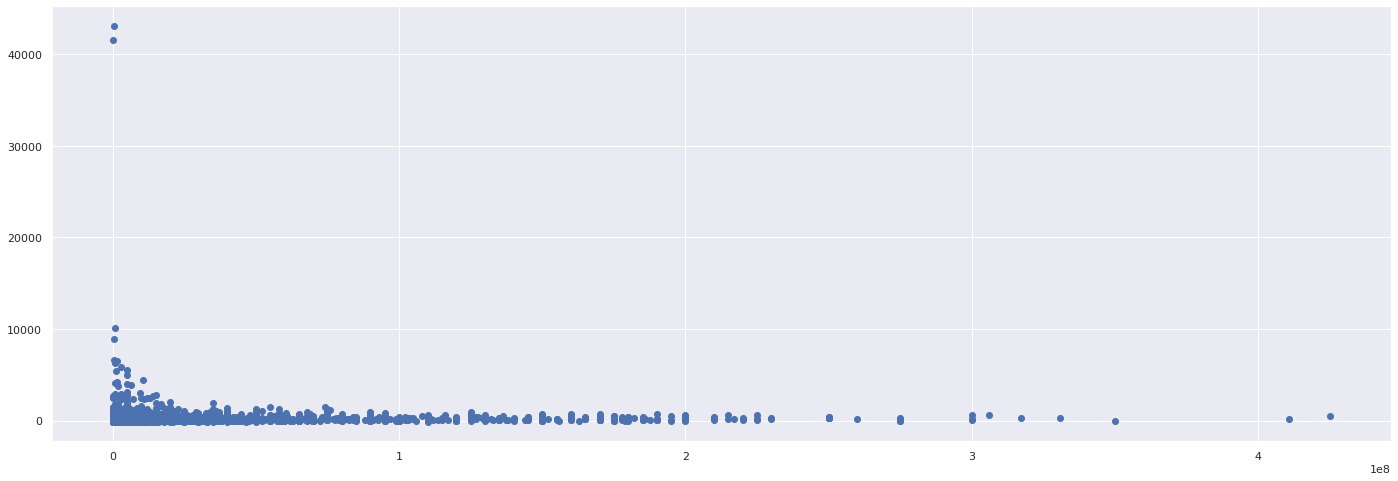

In [45]:
sns.set(rc={"figure.figsize":(24, 8)})

fig, ax = plt.subplots()

ax.scatter(roi_recent['production_budget'], roi_recent['roi']);

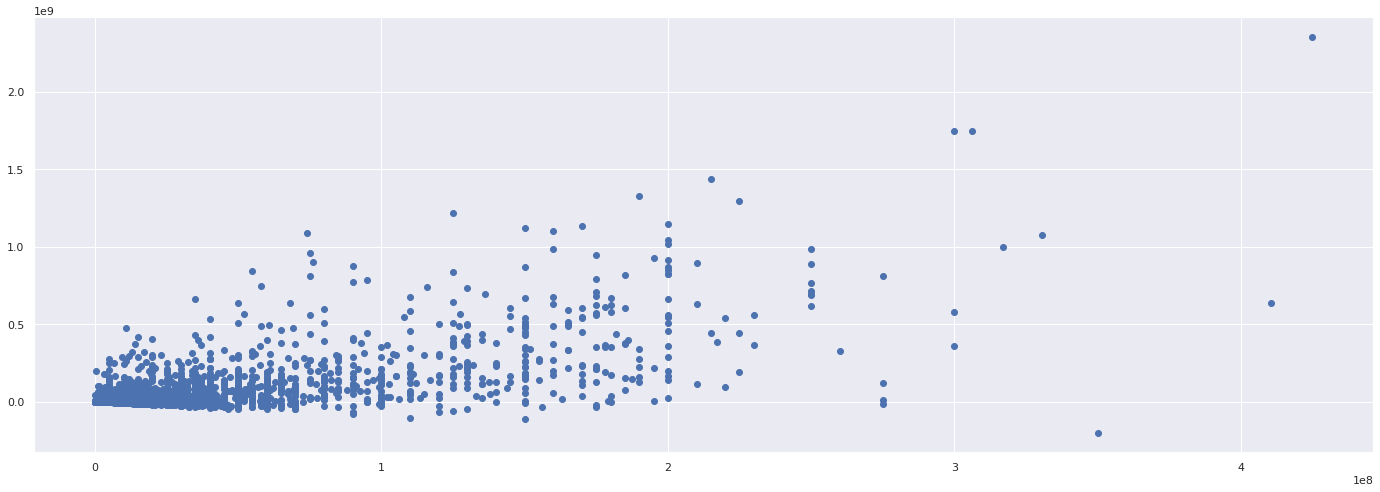

In [46]:
fig, ax = plt.subplots()

ax.scatter(profits_recent['production_budget'], profits_recent['profit']);

In [47]:
print('The correlation between production budget and profit is {}.'.format(round(np.corrcoef(profits_recent['production_budget'], profits_recent['profit'])[0][1], 3)))
print('The correlation between production budget and roi is {}.'.format(round(np.corrcoef(profits_recent['production_budget'], profits_recent['roi'])[0][1], 3)))

The correlation between production budget and profit is 0.672.
The correlation between production budget and roi is -0.043.


In [48]:
#sns.regplot(x='production_budget', y='profit', data=profits_recent);

In [49]:
#sns.scatterplot(x='production_budget', y='roi', data=roi_recent, edgecolor='none', alpha=.8);

### Remove the outliers from the ROI dataset

In [50]:
roi_recent_no_outliers = roi_recent

roi_recent_no_outliers = roi_recent_no_outliers[roi_recent['roi'] < 3500]

roi_recent_no_outliers

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,roi
0,1,2009-12-18,Avatar,425000000,760507625,2776345279,553.257713
1,2,2011-05-20,Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875,154.667286
2,3,2019-06-07,Dark Phoenix,350000000,42762350,149762350,-57.210757
3,4,2015-05-01,Avengers: Age of Ultron,330600000,459005868,1403013963,324.384139
4,5,2017-12-15,Star Wars Ep. VIII: The Last Jedi,317000000,620181382,1316721747,315.369636
...,...,...,...,...,...,...,...
5740,41,2010-10-15,Down Terrace,30000,9812,9812,-67.293333
5744,45,2017-01-27,Emily,27000,3547,3547,-86.862963
5760,61,2010-04-02,Breaking Upwards,15000,115592,115592,670.613333
5770,71,2008-08-14,The Rise and Fall of Miss Thang,10000,401,401,-95.990000


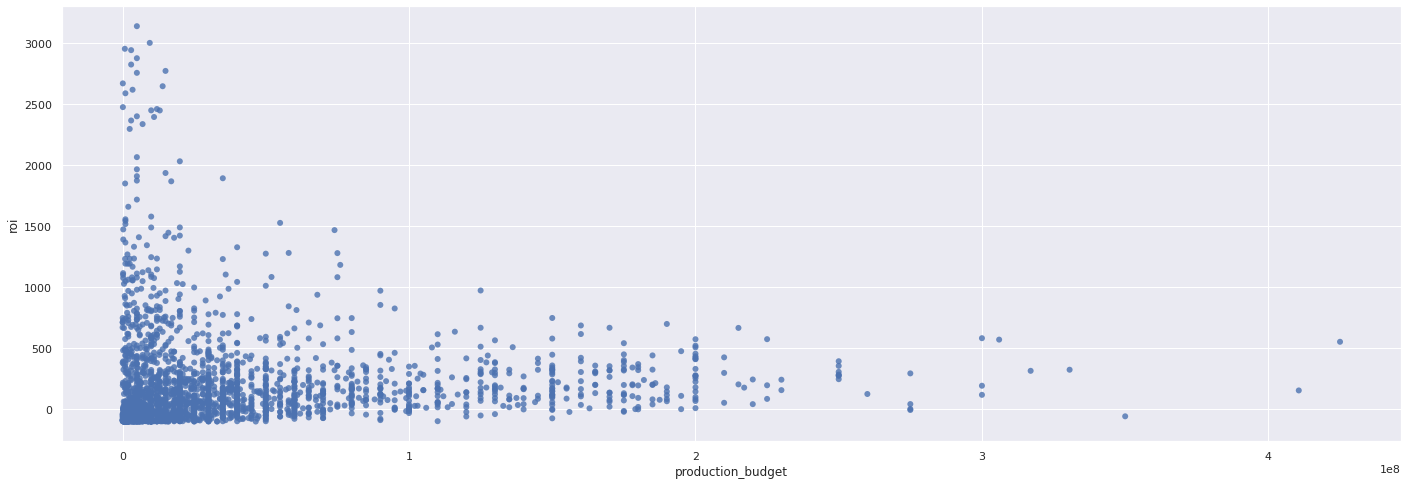

In [51]:
sns.scatterplot(x='production_budget', y='roi', data=roi_recent_no_outliers, edgecolor='none', alpha=.8);

In [52]:
#print('The correlation between production budget and ROI is {}.'.format(round(np.corrcoef(roi_recent_no_outliers['production_budget'], roi_recent_no_outliers['roi'])[0][1], 3)))

In [53]:
profits_recent.sort_values('profit', ascending=False).head(50)

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,roi,profit
0,1,2009-12-18,Avatar,425000000,760507625,2776345279,553.257713,2351345279
6,7,2018-04-27,Avengers: Infinity War,300000000,678815482,2048134200,582.711400,1748134200
5,6,2015-12-18,Star Wars Ep. VII: The Force Awakens,306000000,936662225,2053311220,571.016739,1747311220
33,34,2015-06-12,Jurassic World,215000000,652270625,1648854864,666.909239,1433854864
66,67,2015-04-03,Furious 7,190000000,353007020,1518722794,699.327786,1328722794
26,27,2012-05-04,The Avengers,225000000,623279547,1517935897,574.638176,1292935897
260,61,2011-07-15,Harry Potter and the Deathly Hallows: Part II,125000000,381193157,1341693157,973.354526,1216693157
41,42,2018-02-16,Black Panther,200000000,700059566,1348258224,574.129112,1148258224
112,13,2018-06-22,Jurassic World: Fallen Kingdom,170000000,417719760,1305772799,668.101646,1135772799
155,56,2013-11-22,Frozen,150000000,400738009,1272469910,748.313273,1122469910


In [54]:
profits_recent.head(25)

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,roi,profit
0,1,2009-12-18,Avatar,425000000,760507625,2776345279,553.257713,2351345279
1,2,2011-05-20,Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875,154.667286,635063875
2,3,2019-06-07,Dark Phoenix,350000000,42762350,149762350,-57.210757,-200237650
3,4,2015-05-01,Avengers: Age of Ultron,330600000,459005868,1403013963,324.384139,1072413963
4,5,2017-12-15,Star Wars Ep. VIII: The Last Jedi,317000000,620181382,1316721747,315.369636,999721747
5,6,2015-12-18,Star Wars Ep. VII: The Force Awakens,306000000,936662225,2053311220,571.016739,1747311220
6,7,2018-04-27,Avengers: Infinity War,300000000,678815482,2048134200,582.711400,1748134200
8,9,2017-11-17,Justice League,300000000,229024295,655945209,118.648403,355945209
9,10,2015-11-06,Spectre,300000000,200074175,879620923,193.206974,579620923
10,11,2012-07-20,The Dark Knight Rises,275000000,448139099,1084439099,294.341491,809439099


Matt next steps:

Make a graph of relase dates

Calculate runtimes, graph that.

Run main dataset correlations against profits and roi.

### Exploratory questions from above:

2. What are the top 100 films by net profit, roi, and roi(excluding low-budget films) over the time period? 
    a. What are their genres? If we aggregate, what are the three most common genres?
    b. Who directed them?
    c. Who stars?
    d. Which studios made them?
    e. What are their runtimes? If we aggregate, what is the mean? How dispersed?
    
3. What are the bottom 100 films by each of the above categories? Same subquestions.

4. Many movie studios have their own "mini-studios" to compete with the independent and indy-filmmaking scene. Are the relative profits of big budget movies higher or lower than low budget movies? Are the relative profits of one category more dispersed than the other category? Depending on the answers, we might recommend to Microsoft to either, indeed, create a "mini-studio" of their own, or to forego doing so.

5. Do studios who make a high amount of movies per year make more profit (relative to budgets) than studios who make a small amount of movies per year?

6. Do critically acclaimed movies correlate to higher profits? If no, I think it's worth pointing this out, and specifally warning them against chasing after critical acclaim. 

### What data to use: 

profits_recent - This dataframe contains gross profit, ROI, and net profit for only movies from the last 10 years (2008-2018) and can be used to calculate the top films by profit and/or ROI (and top films by ROI, excluding low budget films).

sixth_join - This dataframe is the monster dataframe. It has been joined with the above dataframe, so after lists of the top films has been made, it can be crossreferenced with the corresponding entries in this dataframe. 

In [55]:
profits_recent.sort_values('roi', ascending=False).head(100)['movie']

5492        Paranormal Activity
5679                The Gallows
5211           The Devil Inside
5459                       Home
5428                  Fireproof
                 ...           
1067                 Mamma Mia!
625     The Secret Life of Pets
4642                   Whiplash
4262                   The Gift
5608                    Bronson
Name: movie, Length: 100, dtype: object

In [56]:
profits_recent.sort_values('roi', ascending=True).head(100)['movie']

4081                         Perrierâs Bounty
3818                                 Skin Trade
1242                                 Mr. Nobody
3728                            Janky Promoters
5296                                  Childless
                         ...                   
4471    George A. Romero's Survival of the Dead
5461                            The Living Wake
3524                      The Last Days on Mars
3731                                   Barbecue
3714                                High School
Name: movie, Length: 100, dtype: object

In [57]:
profits_recent.sort_values('profit', ascending=False).head(100)['movie']

0                                    Avatar
6                    Avengers: Infinity War
5      Star Wars Ep. VII: The Force Awakens
33                           Jurassic World
66                                Furious 7
                       ...                 
241                           Kung Fu Panda
131                            Interstellar
287                              Life of Pi
165                    Thor: The Dark World
841                              Mei Ren Yu
Name: movie, Length: 100, dtype: object

In [58]:
profits_recent.sort_values('profit', ascending=True).head(100)['movie']

2                                      Dark Phoenix
193                                 Mars Needs Moms
341                     Men in Black: International
477                                     The Promise
300                                How Do You Know?
                           ...                     
2693                                     Middle Men
1500                               A Thousand Words
2695                                All Good Things
2690    The Oogieloves in the BIG Balloon Adventure
2027                               Taking Woodstock
Name: movie, Length: 100, dtype: object

In [59]:
profits_recent[profits_recent['production_budget'] > 10000000].sort_values('roi', ascending=False).head(100)['movie']

3517                                Les Intouchables
2996                             The Kingâs Speech
3173                             Slumdog Millionaire
3342                          The Fault in Our Stars
3245                                      Black Swan
                            ...                     
263     Harry Potter and the Deathly Hallows: Part I
112                   Jurassic World: Fallen Kingdom
33                                    Jurassic World
843                                   The Lego Movie
3247                  Justin Bieber: Never Say Never
Name: movie, Length: 100, dtype: object

In [60]:
profits_recent[profits_recent['production_budget'] > 10000000].sort_values('roi', ascending=True).head(100)['movie']

1242                           Mr. Nobody
3447                10 Days in a Madhouse
2977                                 Good
1782                     Freaks of Nature
3149                       Winnie Mandela
                      ...                
745     Legends of Oz: Dorothyâs Return
1735                   Punisher: War Zone
1989                             Stronger
1985                     Barney's Version
2748                      Won't Back Down
Name: movie, Length: 100, dtype: object

### Convert movie_budgets_numeric dates to datetime

In [61]:
profits_recent['day_of_year'] = profits_recent['release_date'].dt.dayofyear

<ipython-input-61-d52282f78fb7>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  profits_recent['day_of_year'] = profits_recent['release_date'].dt.dayofyear


In [62]:
profits_recent

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,roi,profit,day_of_year
0,1,2009-12-18,Avatar,425000000,760507625,2776345279,553.257713,2351345279,352
1,2,2011-05-20,Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875,154.667286,635063875,140
2,3,2019-06-07,Dark Phoenix,350000000,42762350,149762350,-57.210757,-200237650,158
3,4,2015-05-01,Avengers: Age of Ultron,330600000,459005868,1403013963,324.384139,1072413963,121
4,5,2017-12-15,Star Wars Ep. VIII: The Last Jedi,317000000,620181382,1316721747,315.369636,999721747,349
...,...,...,...,...,...,...,...,...,...
5740,41,2010-10-15,Down Terrace,30000,9812,9812,-67.293333,-20188,288
5744,45,2017-01-27,Emily,27000,3547,3547,-86.862963,-23453,27
5760,61,2010-04-02,Breaking Upwards,15000,115592,115592,670.613333,100592,92
5770,71,2008-08-14,The Rise and Fall of Miss Thang,10000,401,401,-95.990000,-9599,227


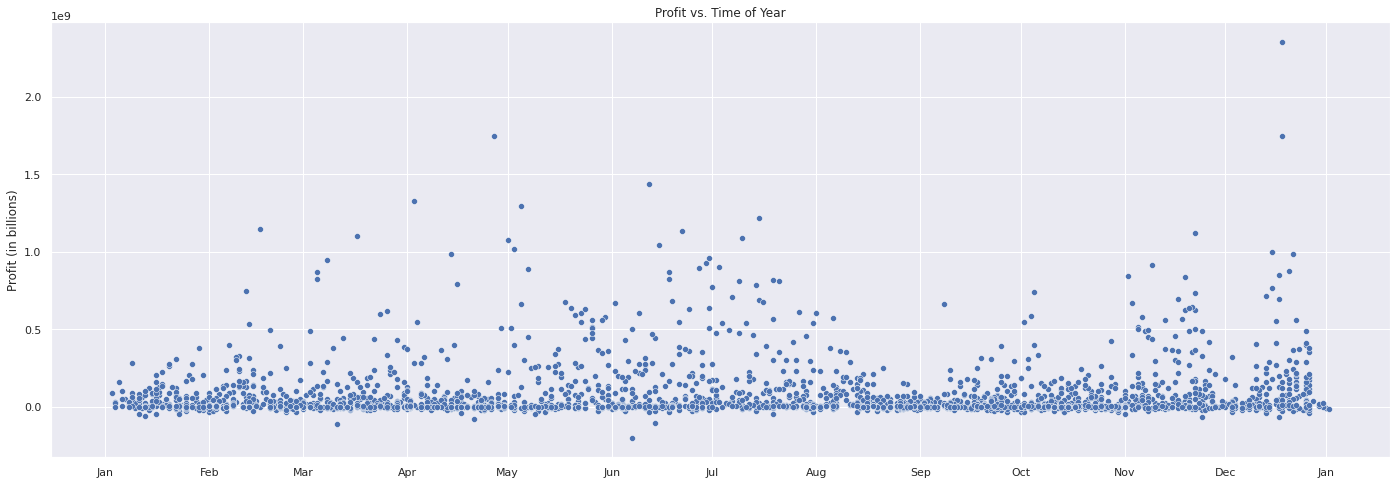

In [63]:
sns.set(rc={"figure.figsize":(24, 8)})
sns.scatterplot(x='day_of_year', y='profit', data=profits_recent).set(xlabel =None, ylabel = "Profit (in billions)", title ='Profit vs. Time of Year')
#sns.lineplot(x='day_of_year', y='profit', data=profits_recent).set(xlabel =None, ylabel = "Profit (in billions)", title ='Profit vs. Time of Year')
plt.xticks([1, 32, 60, 91, 121, 152, 182, 213, 244, 274, 305, 335, 365], ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec', 'Jan'])
plt.savefig('profit_vs_time.png');

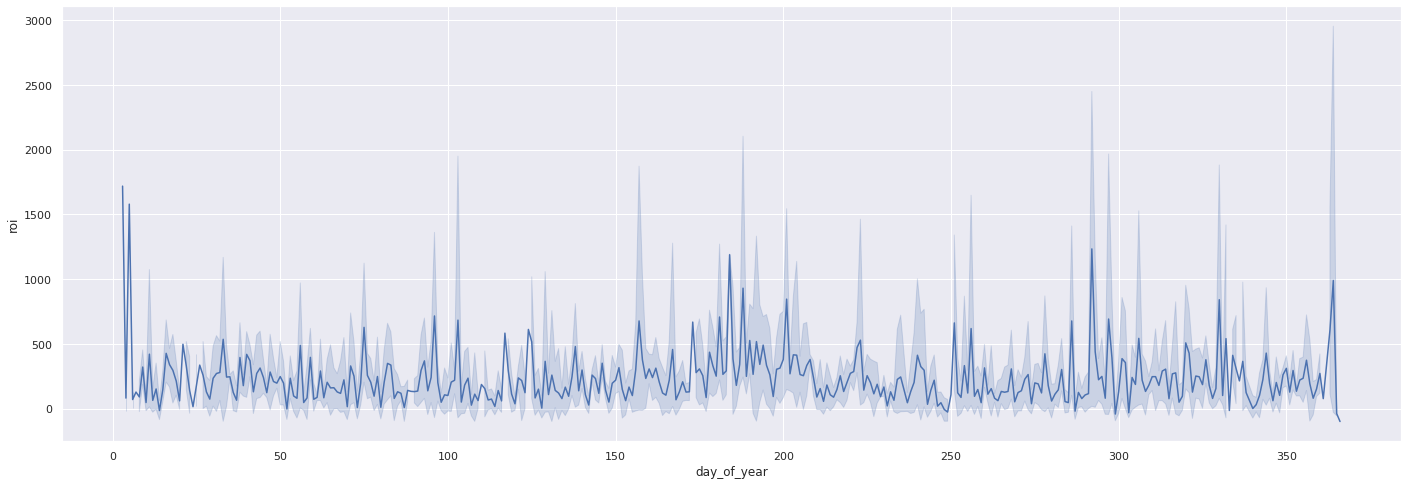

In [64]:
sns.set(rc={"figure.figsize":(24, 8)})
sns.lineplot(x='day_of_year', y='roi', data=profits_recent[profits_recent['roi'] < 3500]);

### Do gross profits correlate with net? If so, we needn't throw away all the data without production budget.

In [65]:
print('The correlation between worldwide gross and profit is {}.'.format(round(np.corrcoef(profits_recent['worldwide_gross'], profits_recent['profit'])[0][1], 3)))
print('The correlation between domestic gross and profit is {}.'.format(round(np.corrcoef(profits_recent['domestic_gross'], profits_recent['profit'])[0][1], 3)))

The correlation between worldwide gross and profit is 0.985.
The correlation between domestic gross and profit is 0.931.


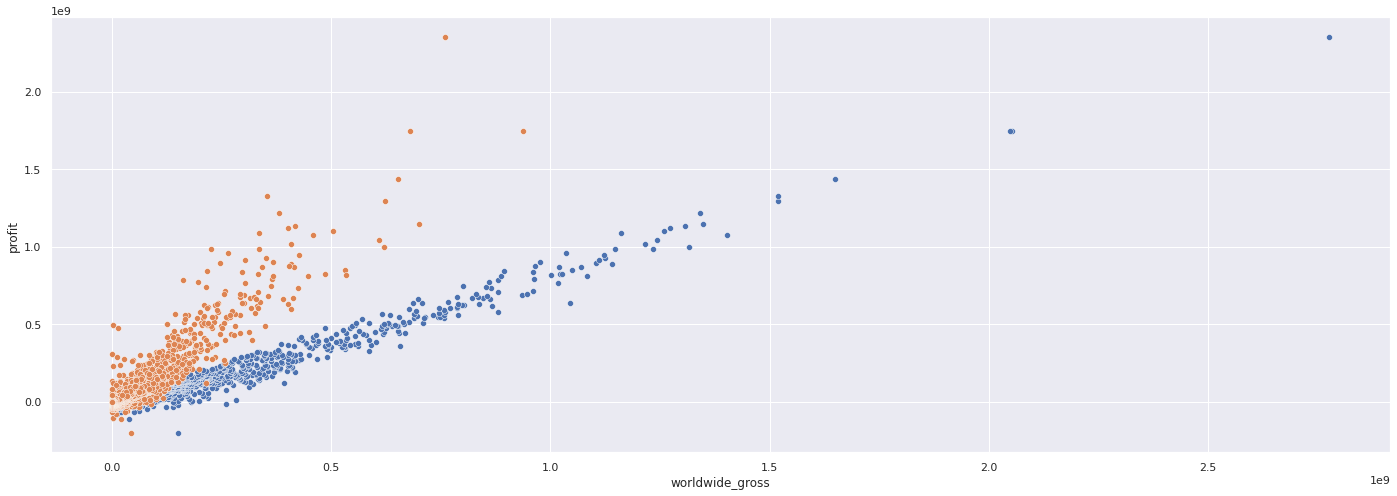

In [66]:
sns.scatterplot(x='worldwide_gross', y='profit', data=profits_recent)
sns.scatterplot(x='domestic_gross', y='profit', data=profits_recent);

### Calculate Average Profits in each category (low-budget, middle-budget, big budget)

In [67]:
low_budget = profits_recent[profits_recent['production_budget'] < 10000000]
print(low_budget['profit'].mean())

12389120.993630573


In [68]:
middle_budget = profits_recent[(profits_recent['production_budget'] >= 10000000) & (profits_recent['production_budget'] < 100000000)]
print(middle_budget['profit'].mean())

65638319.19015151


In [69]:
big_budget = profits_recent[profits_recent['production_budget'] >= 100000000]
print(big_budget['profit'].mean())

361183045.5229682


In [70]:
print(low_budget['profit'].std())
print(middle_budget['profit'].std())
print(big_budget['profit'].std())

33252571.27505031
116780636.24708831
344588958.38909155


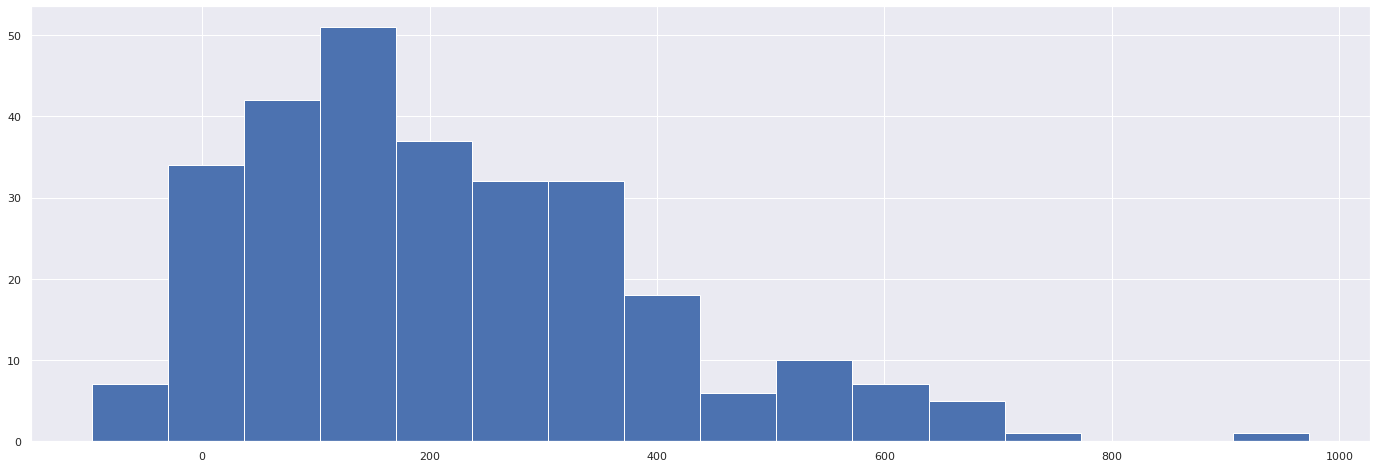

In [78]:
fig, ax = plt.subplots()

#ax.hist(low_budget['profit'], bins='auto');
#ax.hist(middle_budget['profit'], bins='auto');
#ax.hist(big_budget['profit'], bins='auto');

#ax.hist(low_budget['roi'], bins='auto');
#ax.hist(middle_budget['roi'], bins='auto');
#ax.hist(big_budget['roi'], bins='auto');

#ax.hist(profits_recent['profit'], bins='auto');
#ax.hist(profits_recent['roi'], bins=200);

### Add some useful items to profits_recent (like runtime, etc.)

In [222]:


#runtime_join_one = sixth_join.merge(profits_recent, how='right', left_on='title', right_on='movie')

#runtime_join_one['runtime_minutes'].isna().count()

77484

In [ ]:
### Add regions dataset

### Clean Dataset for Grace

In [1]:
#import pandas as pd
#import numpy as np
#import matplotlib.pyplot as plt
#import seaborn as sns
#%matplotlib inline

#movie_budgets_df = pd.read_csv('data/tn.movie_budgets.csv')

#movie_budgets_clean = movie_budgets_df.dropna(subset=['production_budget', 'domestic_gross', 'worldwide_gross'], how='any')

#movie_budgets_numeric = movie_budgets_clean
#movie_budgets_numeric[movie_budgets_numeric.columns[3:]] = movie_budgets_numeric[movie_budgets_numeric.columns[3:]].apply(lambda x: x.str[1:].str.split(',').str.join('')).astype(np.int64)

#roi_df = movie_budgets_numeric[movie_budgets_numeric.domestic_gross !=0]
#roi_df = roi_df[roi_df.worldwide_gross !=0]

#roi_df['roi'] = (roi_df['worldwide_gross'] - roi_df['production_budget']) / roi_df['production_budget'] * 100

#roi_recent = roi_df
#roi_recent['release_date'] = pd.to_datetime(roi_recent['release_date'], format='%b %d, %Y')
#roi_recent = roi_recent[roi_recent['release_date'] >= pd.Timestamp(2008, 1, 1, 12)]

#profits_roi_df = roi_df
#profits_roi_df['profit'] = profits_roi_df['worldwide_gross'] - profits_roi_df['production_budget']

#profits_recent = profits_roi_df
#profits_recent = profits_recent[profits_recent['release_date'] >= pd.Timestamp(2008, 1, 1, 12)]

#profits_recent['day_of_year'] = profits_recent['release_date'].dt.dayofyear

#profits_recent.head(50)

In [251]:
profits_recent_mov_index = profits_recent.set_index('movie')
title_akas_mov_index = title_akas_df.set_index('title')

profits_region = profits_recent_mov_index.join(title_akas_mov_index, how='left')

profits_region.sort_values('profit', ascending=False)



title_crew_tconst_index = title_crew_df.set_index('tconst')

profits_directors = profits_region.join(title_crew_tconst_index, on='title_id', how='left')



profits_directors_no_dups = profits_directors.drop_duplicates(subset='title_id')


profits_directors_no_dups.sort_values('profit', ascending=False).head()

,id,release_date,production_budget,domestic_gross,worldwide_gross,roi,profit,day_of_year,title_id,ordering,region,language,types,attributes,is_original_title,directors,writers
Avatar,1,2009-12-18,425000000,760507625,2776345279,553.257713,2351345279,352,tt1775309,2.0,XWW,en,imdbDisplay,NaN,0.0,nm3786927,"nm2179863,nm4392664"
Avengers: Infinity War,7,2018-04-27,300000000,678815482,2048134200,582.711400,1748134200,117,tt4154756,10.0,AR,NaN,imdbDisplay,NaN,0.0,"nm0751577,nm0751648","nm1321655,nm1321656,nm0498278,nm0456158,nm0800..."
Jurassic World,34,2015-06-12,215000000,652270625,1648854864,666.909239,1433854864,163,tt0369610,14.0,FR,NaN,imdbDisplay,NaN,0.0,nm1119880,"nm0415425,nm0798646,nm1119880,nm2081046,nm0000341"
Furious 7,67,2015-04-03,190000000,353007020,1518722794,699.327786,1328722794,93,tt2820852,10.0,NL,NaN,imdbDisplay,NaN,0.0,nm1490123,"nm0604555,nm0860155"
The Avengers,27,2012-05-04,225000000,623279547,1517935897,574.638176,1292935897,125,tt0848228,19.0,NaN,NaN,original,NaN,1.0,nm0923736,"nm0923736,nm0672015"


In [252]:
profits_directors_no_dups = profits_directors_no_dups.dropna(subset=['directors'])

In [253]:
profits_directors_no_dups['single_directors'] = profits_directors_no_dups['directors'].apply(lambda x: x.split(','))

In [254]:
profits_directors_exploded = profits_directors_no_dups.explode('single_directors')

In [255]:
profits_directors_exploded = profits_directors_exploded.reset_index()
profits_directors_exploded = profits_directors_exploded.set_index('single_directors')

In [256]:
people_info_namecode_index = people_info_df.set_index('nconst')

In [257]:
people_info_df.head()

,nconst,primary_name,birth_year,death_year,primary_profession,known_for_titles
0,nm0061671,Mary Ellen Bauder,NaN,NaN,"miscellaneous,production_manager,producer","tt0837562,tt2398241,tt0844471,tt0118553"
1,nm0061865,Joseph Bauer,NaN,NaN,"composer,music_department,sound_department","tt0896534,tt6791238,tt0287072,tt1682940"
2,nm0062070,Bruce Baum,NaN,NaN,"miscellaneous,actor,writer","tt1470654,tt0363631,tt0104030,tt0102898"
3,nm0062195,Axel Baumann,NaN,NaN,"camera_department,cinematographer,art_department","tt0114371,tt2004304,tt1618448,tt1224387"
4,nm0062798,Pete Baxter,NaN,NaN,"production_designer,art_department,set_decorator","tt0452644,tt0452692,tt3458030,tt2178256"


In [258]:
profits_director_names = profits_directors_exploded.join(people_info_namecode_index, how='left')

In [259]:
profits_director_names.sort_values('profit', ascending=False).head(50)

,index,id,release_date,production_budget,domestic_gross,worldwide_gross,roi,profit,day_of_year,title_id,...,types,attributes,is_original_title,directors,writers,primary_name,birth_year,death_year,primary_profession,known_for_titles
nm3786927,Avatar,1,2009-12-18,425000000,760507625,2776345279,553.257713,2351345279,352,tt1775309,...,imdbDisplay,NaN,0.0,nm3786927,"nm2179863,nm4392664",Atsushi Wada,NaN,NaN,director,"tt1594549,tt1775309,tt1602612"
nm0751648,Avengers: Infinity War,7,2018-04-27,300000000,678815482,2048134200,582.711400,1748134200,117,tt4154756,...,imdbDisplay,NaN,0.0,"nm0751577,nm0751648","nm1321655,nm1321656,nm0498278,nm0456158,nm0800...",Joe Russo,1971.0,NaN,"producer,director,writer","tt4154756,tt4154796,tt1843866,tt3498820"
nm0751577,Avengers: Infinity War,7,2018-04-27,300000000,678815482,2048134200,582.711400,1748134200,117,tt4154756,...,imdbDisplay,NaN,0.0,"nm0751577,nm0751648","nm1321655,nm1321656,nm0498278,nm0456158,nm0800...",Anthony Russo,1970.0,NaN,"producer,director,writer","tt1843866,tt4154756,tt3498820,tt4154796"
nm1119880,Jurassic World,34,2015-06-12,215000000,652270625,1648854864,666.909239,1433854864,163,tt0369610,...,imdbDisplay,NaN,0.0,nm1119880,"nm0415425,nm0798646,nm1119880,nm2081046,nm0000341",Colin Trevorrow,1976.0,NaN,"writer,producer,director","tt0369610,tt4881806,tt4572792,tt1862079"
nm1490123,Furious 7,67,2015-04-03,190000000,353007020,1518722794,699.327786,1328722794,93,tt2820852,...,imdbDisplay,NaN,0.0,nm1490123,"nm0604555,nm0860155",James Wan,1977.0,NaN,"producer,writer,director","tt1457767,tt0387564,tt3065204,tt2820852"
nm0923736,The Avengers,27,2012-05-04,225000000,623279547,1517935897,574.638176,1292935897,125,tt0848228,...,original,NaN,1.0,nm0923736,"nm0923736,nm0672015",Joss Whedon,1964.0,NaN,"writer,producer,director","tt0118276,tt0162065,tt0848228,tt1259521"
nm3865402,Black Panther,42,2018-02-16,200000000,700059566,1348258224,574.129112,1148258224,47,tt2905856,...,alternative,NaN,0.0,nm3865402,"nm3865402,nm3867015",Samuel Perriard,1983.0,NaN,"director,writer,editor","tt2905856,tt1631701,tt2156260,tt1626141"
nm3363032,Black Panther,42,2018-02-16,200000000,700059566,1348258224,574.129112,1148258224,47,tt1825683,...,imdbDisplay,NaN,0.0,nm3363032,"nm3363032,nm1963288,nm0498278,nm0456158",Ryan Coogler,1986.0,NaN,"director,writer,producer","tt1825683,tt6343314,tt2334649,tt3076658"
nm1291105,Jurassic World: Fallen Kingdom,13,2018-06-22,170000000,417719760,1305772799,668.101646,1135772799,173,tt4881806,...,imdbDisplay,NaN,0.0,nm1291105,"nm2081046,nm1119880,nm0000341",J.A. Bayona,1975.0,NaN,"director,writer,actor","tt1649419,tt0464141,tt3416532,tt4881806"
nm1601644,Frozen,56,2013-11-22,150000000,400738009,1272469910,748.313273,1122469910,326,tt2294629,...,imdbDisplay,NaN,0.0,"nm0118333,nm1601644","nm1601644,nm0026153,nm0118333,nm2280850",Jennifer Lee,1971.0,NaN,"writer,miscellaneous,producer","tt2294629,tt2948356,tt1620680,tt1772341"


In [260]:
profits_director_names.sort_values('profit', ascending=False).head(168)['primary_name']

nm3786927        Atsushi Wada
nm0751648           Joe Russo
nm0751577       Anthony Russo
nm1119880     Colin Trevorrow
nm1490123           James Wan
                   ...       
nm8504594    Melinte Reitzema
nm3440368          Elisa Chee
nm0005363         Guy Ritchie
nm2428276        George Anton
nm3227090     Damien Chazelle
Name: primary_name, Length: 168, dtype: object

In [261]:
profits_director_names.at[profits_director_names.sort_values('profit', ascending=False).index[0], 'primary_name'] = 'James Cameron'

In [262]:
#Run only once
#profits_director_names = profits_director_names.sort_values('profit', ascending=False).drop(profits_director_names.sort_values('profit', ascending=False).index[6])

In [263]:
profits_director_names.sort_values('profit', ascending=False).head()

,index,id,release_date,production_budget,domestic_gross,worldwide_gross,roi,profit,day_of_year,title_id,...,types,attributes,is_original_title,directors,writers,primary_name,birth_year,death_year,primary_profession,known_for_titles
nm3786927,Avatar,1,2009-12-18,425000000,760507625,2776345279,553.257713,2351345279,352,tt1775309,...,imdbDisplay,NaN,0.0,nm3786927,"nm2179863,nm4392664",James Cameron,NaN,NaN,director,"tt1594549,tt1775309,tt1602612"
nm0751577,Avengers: Infinity War,7,2018-04-27,300000000,678815482,2048134200,582.711400,1748134200,117,tt4154756,...,imdbDisplay,NaN,0.0,"nm0751577,nm0751648","nm1321655,nm1321656,nm0498278,nm0456158,nm0800...",Anthony Russo,1970.0,NaN,"producer,director,writer","tt1843866,tt4154756,tt3498820,tt4154796"
nm0751648,Avengers: Infinity War,7,2018-04-27,300000000,678815482,2048134200,582.711400,1748134200,117,tt4154756,...,imdbDisplay,NaN,0.0,"nm0751577,nm0751648","nm1321655,nm1321656,nm0498278,nm0456158,nm0800...",Joe Russo,1971.0,NaN,"producer,director,writer","tt4154756,tt4154796,tt1843866,tt3498820"
nm1119880,Jurassic World,34,2015-06-12,215000000,652270625,1648854864,666.909239,1433854864,163,tt0369610,...,imdbDisplay,NaN,0.0,nm1119880,"nm0415425,nm0798646,nm1119880,nm2081046,nm0000341",Colin Trevorrow,1976.0,NaN,"writer,producer,director","tt0369610,tt4881806,tt4572792,tt1862079"
nm1490123,Furious 7,67,2015-04-03,190000000,353007020,1518722794,699.327786,1328722794,93,tt2820852,...,imdbDisplay,NaN,0.0,nm1490123,"nm0604555,nm0860155",James Wan,1977.0,NaN,"producer,writer,director","tt1457767,tt0387564,tt3065204,tt2820852"


In [264]:
profits_director_names.sort_values('profit', ascending=False).head(168)['primary_name'].mode()

0    Pierre Coffin
dtype: object

In [266]:
profits_director_names.groupby('primary_name').mean().sort_values('profit', ascending=False).head(10)

,id,production_budget,domestic_gross,worldwide_gross,roi,profit,day_of_year,ordering,is_original_title,birth_year,death_year
primary_name,,,,,,,,,,,
James Cameron,1.000000,425000000.0,760507625.0,2.776345e+09,553.257713,2.351345e+09,352.000000,2.0,0.000000,NaN,NaN
Joss Whedon,15.500000,277800000.0,541142707.5,1.460475e+09,449.511158,1.182675e+09,123.000000,17.0,0.500000,1964.0,NaN
Chris Buck,56.000000,150000000.0,400738009.0,1.272470e+09,748.313273,1.122470e+09,326.000000,11.0,0.000000,1958.0,NaN
Chi-kin Kwok,56.000000,150000000.0,400738009.0,1.272470e+09,748.313273,1.122470e+09,326.000000,1.0,0.000000,NaN,NaN
Jennifer Lee,56.000000,150000000.0,400738009.0,1.272470e+09,748.313273,1.122470e+09,326.000000,11.0,0.000000,1971.0,NaN
Christophe Gans,35.000000,160000000.0,504014165.0,1.259200e+09,686.999816,1.099200e+09,76.000000,21.0,0.000000,1960.0,NaN
Joe Russo,13.333333,240000000.0,448882263.0,1.300869e+09,419.658523,1.060869e+09,112.666667,17.0,0.333333,1971.0,NaN
Anthony Russo,13.333333,240000000.0,448882263.0,1.300869e+09,419.658523,1.060869e+09,112.666667,17.0,0.333333,1970.0,NaN
Kyle Balda,51.500000,74500000.0,300335035.0,1.097532e+09,1373.829428,1.023032e+09,186.000000,22.0,0.000000,1971.0,NaN
